# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

3787b604c287fe86fc0d9b168688f8d4


### Generate the Cities List by Using the `citipy` Library

In [63]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={unit}&q={city}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | el colomo
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ar rutbah
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | maridi
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | ormara
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | giz

Processing Record 40 of Set 4 | trondheim
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | mana
Processing Record 43 of Set 4 | elmendorf air force base
City not found. Skipping...
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | san patricio
Processing Record 46 of Set 4 | biloela
Processing Record 47 of Set 4 | al qadarif
Processing Record 48 of Set 4 | abadiania
Processing Record 49 of Set 4 | blairgowrie
Processing Record 0 of Set 5 | santa terezinha
Processing Record 1 of Set 5 | shamkhal
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | iron river
Processing Record 4 of Set 5 | hailar
Processing Record 5 of Set 5 | illizi
Processing Record 6 of Set 5 | luwuk
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | oliver
Processing Record 9 of Set 5 | vobarno
Processing Record 10 of Set 5 | doma
Processing Record 11 of Set 5 | an nuhud
Processing Record 12 of Set 5 | espargos
City not found. Sk

Processing Record 31 of Set 8 | katsuren-haebaru
Processing Record 32 of Set 8 | tijara
Processing Record 33 of Set 8 | siem reap
Processing Record 34 of Set 8 | badeggi
Processing Record 35 of Set 8 | nenjiang
Processing Record 36 of Set 8 | luumaki
Processing Record 37 of Set 8 | guaratinga
Processing Record 38 of Set 8 | twentynine palms
Processing Record 39 of Set 8 | acarau
Processing Record 40 of Set 8 | kalix
Processing Record 41 of Set 8 | moyynkum
Processing Record 42 of Set 8 | lysekil
Processing Record 43 of Set 8 | bondo
Processing Record 44 of Set 8 | luganville
Processing Record 45 of Set 8 | remire-montjoly
Processing Record 46 of Set 8 | cuamba
Processing Record 47 of Set 8 | taro
Processing Record 48 of Set 8 | grand falls-windsor
Processing Record 49 of Set 8 | columbus
Processing Record 0 of Set 9 | chamzinka
Processing Record 1 of Set 9 | namibe
Processing Record 2 of Set 9 | villa gesell
Processing Record 3 of Set 9 | nikolayevsk-on-amure
Processing Record 4 of Set

Processing Record 21 of Set 12 | basco
Processing Record 22 of Set 12 | governor's harbour
City not found. Skipping...
Processing Record 23 of Set 12 | kertih
Processing Record 24 of Set 12 | hihifo
City not found. Skipping...
Processing Record 25 of Set 12 | mersing
Processing Record 26 of Set 12 | daru
Processing Record 27 of Set 12 | notodden
Processing Record 28 of Set 12 | reggane
-----------------------------
Data Retrieval Complete      
-----------------------------


In [65]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [66]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.21,80,95,11.50,SH,1688880657
1,port alfred,-33.5906,26.8910,12.35,59,34,12.48,ZA,1688880658
2,qaqortoq,60.7167,-46.0333,6.47,82,90,1.49,GL,1688880659
3,el colomo,19.0500,-104.2500,24.95,78,84,2.38,MX,1688880660
4,yellowknife,62.4560,-114.3525,19.29,42,40,5.66,CA,1688880530


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
#coverting the timestamps to date 
city_data_df["Date"]=pd.to_datetime(city_data_df["Date"],unit="s")
#formating the date format
city_data_df["Date"]=city_data_df["Date"].dt.strftime("%d-%m-%y")
#Displaying the sample_data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.21,80,95,11.50,SH,09-07-23
1,port alfred,-33.5906,26.8910,12.35,59,34,12.48,ZA,09-07-23
2,qaqortoq,60.7167,-46.0333,6.47,82,90,1.49,GL,09-07-23
3,el colomo,19.0500,-104.2500,24.95,78,84,2.38,MX,09-07-23
4,yellowknife,62.4560,-114.3525,19.29,42,40,5.66,CA,09-07-23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

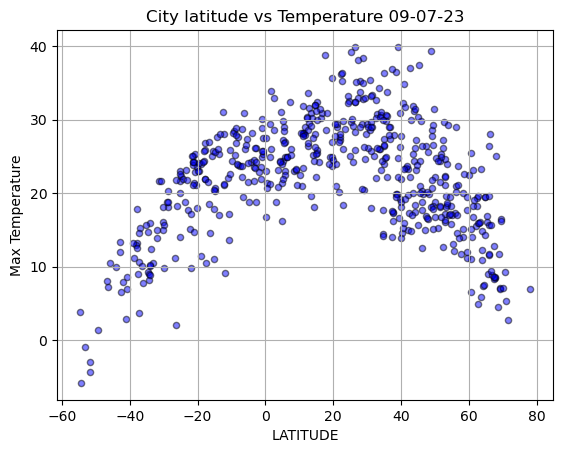

In [69]:
# Build scatter plot for latitude vs. temperature
todays_date = city_data_df["Date"].max()
Latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
x_values = Latitude
y_values = temperature
plt.scatter(x_values,y_values, marker =".",color = "blue",s=80,alpha = 0.5,edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("LATITUDE")
plt.ylabel("Max Temperature")
plt.title(f"City latitude vs Temperature {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

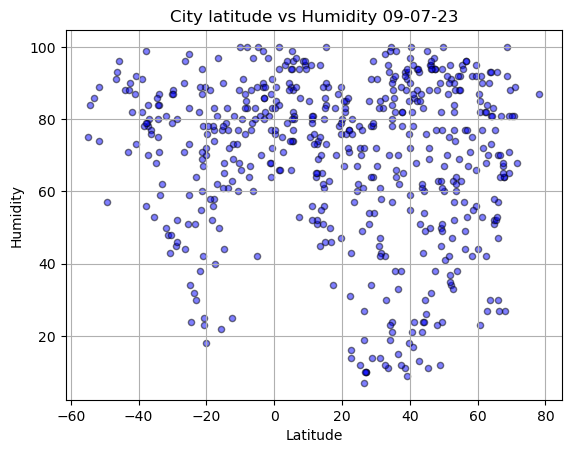

In [70]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City latitude vs Humidity {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

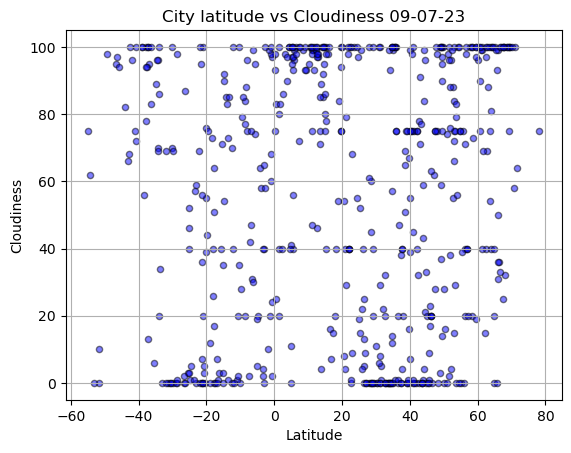

In [71]:
# Build the scatter plots for latitude vs. cloudiness
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City latitude vs Cloudiness {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

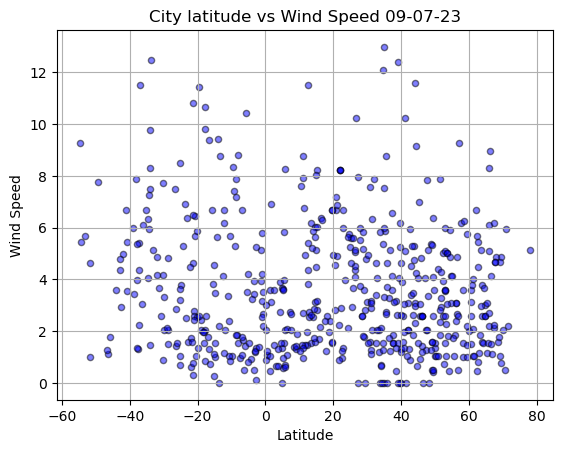

In [72]:
# Build the scatter plots for latitude vs. wind speed
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City latitude vs Wind Speed {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,x_lineq_point,y_lineq_point):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values*slope + intercept
    line_eq = "y = "+ str(round(slope,2)) + "x  + " + str(round(intercept,2))
    plot = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_lineq_point,y_lineq_point),fontsize=15,color = "red")
    print(f"the r value is :{rvalue}")
    plt.xlabel("Latitude")
    

In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaqortoq,60.7167,-46.0333,6.47,82,90,1.49,GL,09-07-23
3,el colomo,19.0500,-104.2500,24.95,78,84,2.38,MX,09-07-23
4,yellowknife,62.4560,-114.3525,19.29,42,40,5.66,CA,09-07-23
5,ar rutbah,33.0381,40.2848,30.71,30,0,4.06,IQ,09-07-23
7,portland,45.5234,-122.6762,20.97,72,0,2.57,US,09-07-23


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.21,80,95,11.50,SH,09-07-23
1,port alfred,-33.5906,26.8910,12.35,59,34,12.48,ZA,09-07-23
6,invercargill,-46.4000,168.3500,7.22,93,97,1.10,NZ,09-07-23
11,puerto natales,-51.7236,-72.4875,-4.31,89,10,1.01,CL,09-07-23
12,port-aux-francais,-49.3500,70.2167,1.40,57,98,7.77,TF,09-07-23


###  Temperature vs. Latitude Linear Regression Plot

the r value is :-0.5697376262459901


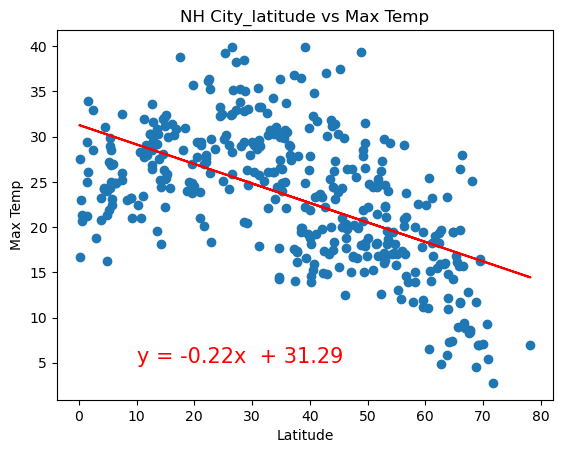

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_lineq_point = 10
y_lineq_point = 5

#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Max Temp")
plt.title("NH City_latitude vs Max Temp")
plt.show()

the r value is :0.8055586948216004


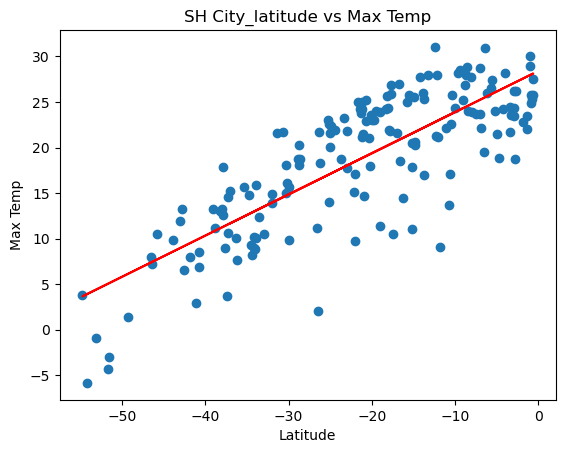

In [77]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_lineq_point = -50
y_lineq_point = 35
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Max Temp")
plt.title("SH City_latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** In the nothern hemisphere the Max Temperature reduces with increase in Latitude.The relationship is a strong negative relationhip.

In the southern hemisphere the Max Temperature reduces with a decrease in Latitude.The relationship is a strong positive relationhip.

The inference we make from this is that is futher we go away from the equator the cooler it becomes.

### Humidity vs. Latitude Linear Regression Plot

the r value is :-0.09371758782036121


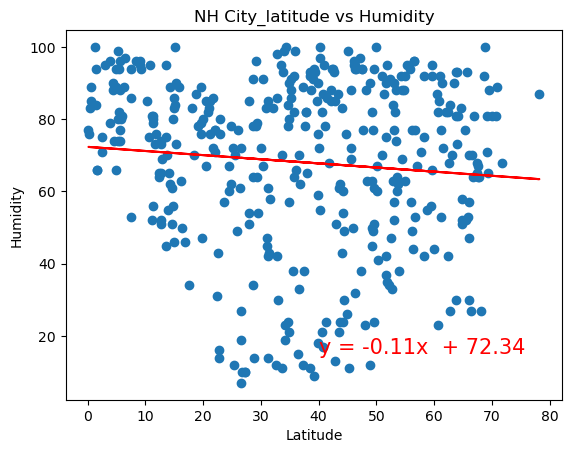

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_lineq_point = 40
y_lineq_point = 15
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Humidity")
plt.title("NH City_latitude vs Humidity")
plt.show()

the r value is :0.007057589725203611


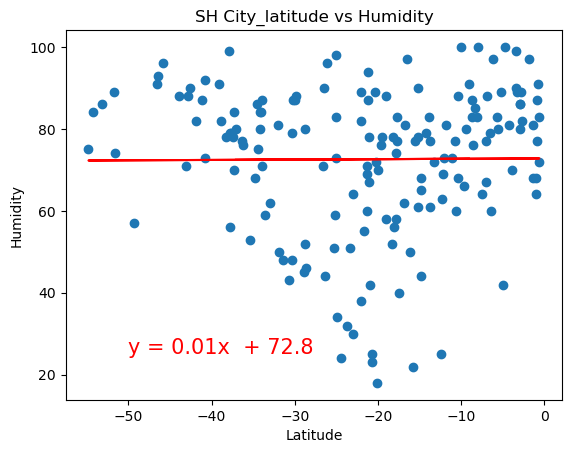

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_lineq_point = -50
y_lineq_point = 25
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Humidity")
plt.title("SH City_latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** there is notable correlation between the Citys latitude and humidty.

### Cloudiness vs. Latitude Linear Regression Plot

the r value is :-0.04788399442364926


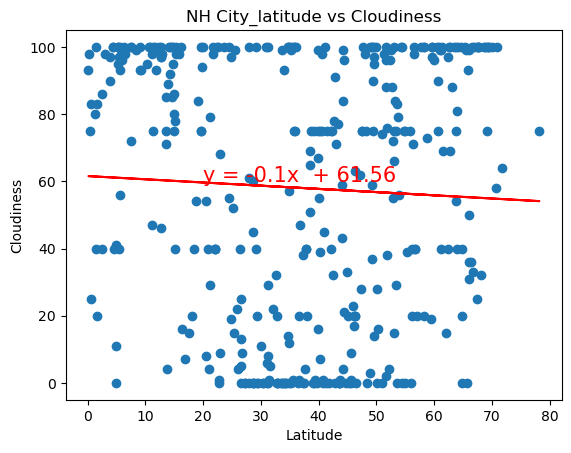

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_lineq_point = 20
y_lineq_point = 60
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Cloudiness")
plt.title("NH City_latitude vs Cloudiness")
plt.show()

the r value is :-0.15811659871764053


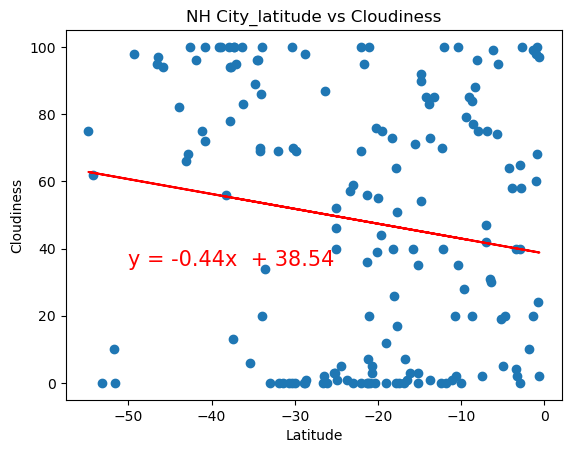

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_lineq_point = -50
y_lineq_point = 35
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Cloudiness")
plt.title("NH City_latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** there is notable correlation between the Citys latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

the r value is :-0.032019349384683544


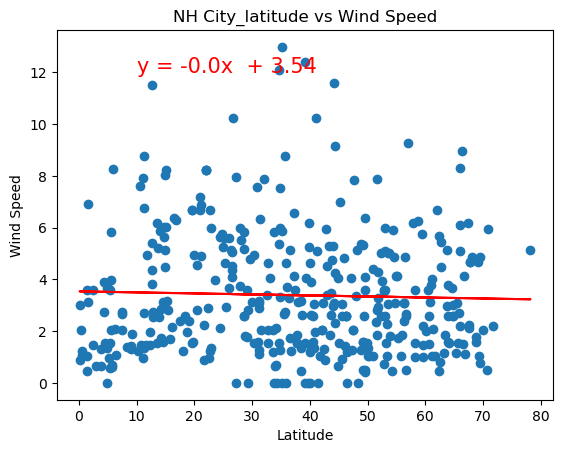

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_lineq_point = 10
y_lineq_point = 12
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Wind Speed")
plt.title("NH City_latitude vs Wind Speed")
plt.show()

the r value is :-0.1996572790158027


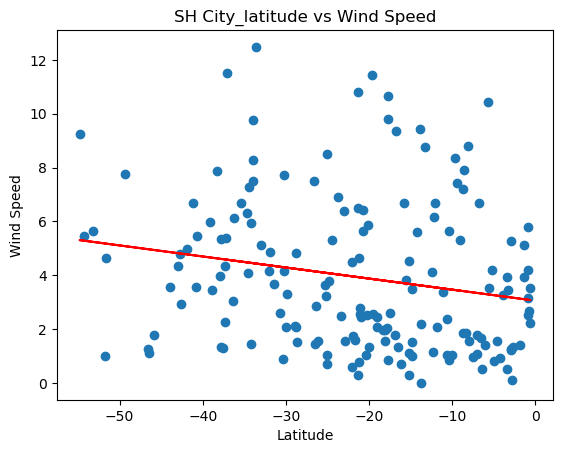

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_lineq_point = -50
y_lineq_point = 14
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Wind Speed")
plt.title("SH City_latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
The windspeed realtionship with the city's latitude for both hemisphere is: a fairly constant range of winspeed across all latitudes. This is inferred from the slope of the lineear equations which are 0.01 and -0.03 for the nothern hemisphere and southern hemisphere respectively.There is no notable correaltion between the City's Latitude and the WindSpeed.